<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEIGM 2025**
# Procesado de imagen: TEST FINAL

Profesor: Christian Mata

**Instrucciones**
Crea tu ejercicio usando un gitHub y GoogleColab y envíalo a: christian.mata@upc.edu

(puedes usar tus apuntes de clase)

Tiempo estimado: 1h

## 1. Carga y visualiza la imagen ‘acero’ (usando Google Drive o cargando manualmente la imagen) usando la librería skimage. Informa del tamaño de la imagen, del tipo de imagen y del rango de los niveles de gris de los píxeles.

*(0,5 puntos)*

In [1]:
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving acero.png to acero.png


In [2]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('acero.png') # read image using imread function

/tmp/ipython-input-1580481455.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
/tmp/ipython-input-1580481455.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


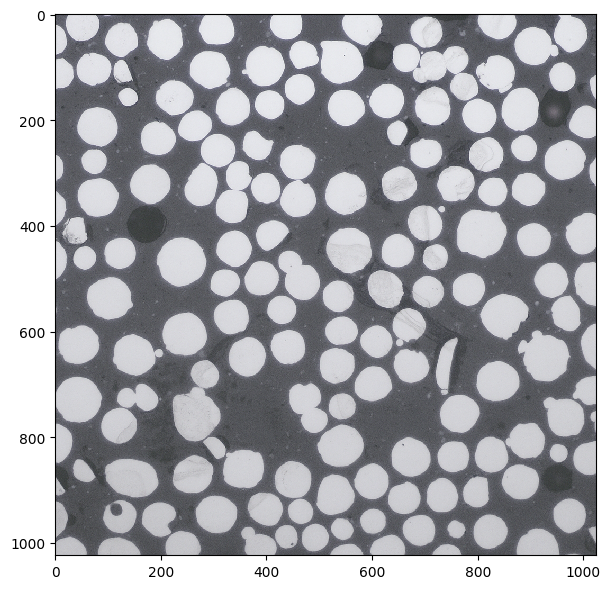

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()


In [4]:
I.shape

(1024, 1024, 3)

In [5]:
I.dtype

dtype('uint8')

## 2. Representa el histograma de la imagen. Explica los picos del histograma en función de las regiones de la imagen.

*(0,5 puntos)*

In [6]:
import numpy as np
from skimage import img_as_ubyte
IG = sk.color.rgb2gray(I)
IG2 = img_as_ubyte(IG)

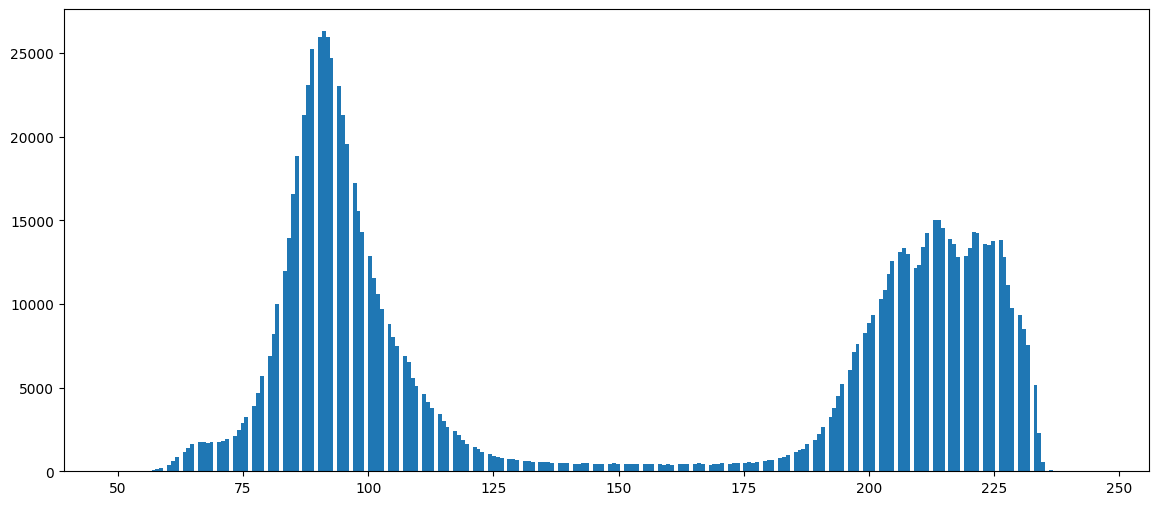

In [7]:
v = IG2.reshape(IG2.shape[0]*IG2.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()


Descripción del resultado obtenido:

Nos vemos dos partidos buen separado que corresponde al partidos grises et blancas. De 200 a 230 son los partidos blancos y de 80 a 110 son los partidos grises

## 3. Aplica ruido a la imagen y utiliza la función adecuada para eliminar dicho ruido. Muestra un plot de tres imágenes (imagen original, imagen con ruído e imagen filtrada sin ruido).

*(1 punto)*

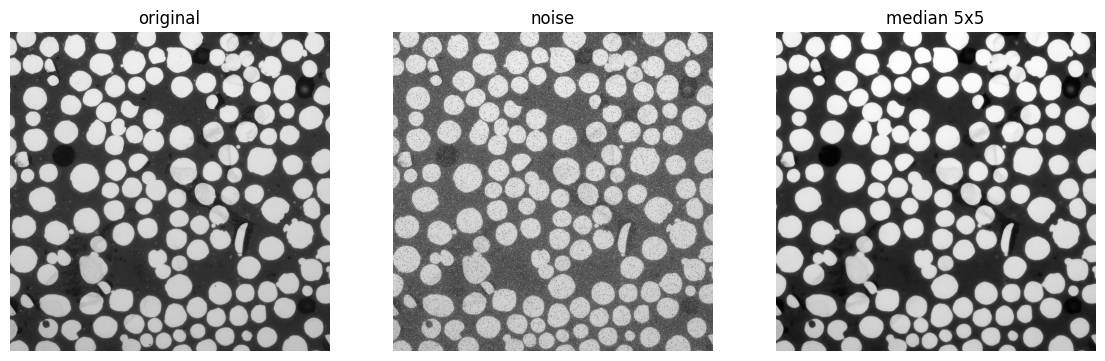

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import median



noise = np.random.random(IG.shape) # uniform random numbers between 0 and 1
noisy_image = IG2
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


img = img_as_ubyte(noisy_image)
sel5 = disk(5) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)

def plot_comparison(original, filtered, filter_name, median, median_name):

    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax3.imshow(median, cmap=plt.cm.gray)
    ax3.set_title(median_name)
    ax3.axis('off')

plot_comparison(IG,noisy_image,'noise',img_med5x5,'median 5x5')


## 4. Segmenta la imagen utilizando un algoritmo de agrupamiento k-means con k = 2 y representa el resultado.
(* Recuerda usar la imagen resultante del apartado anterior, sin ruido)

*(1 punto)*

Cluster centers:
[[0.36932242]
 [0.83218635]]


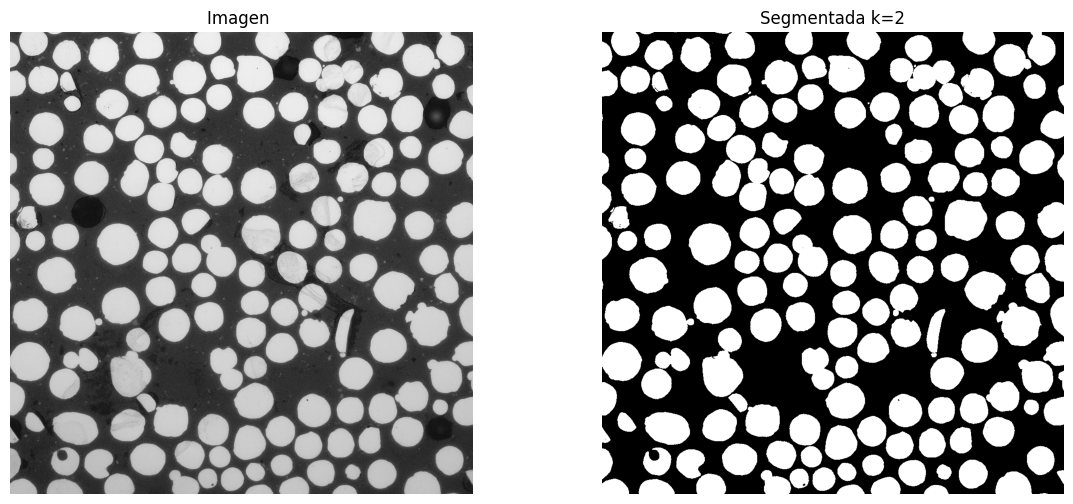

In [18]:

from sklearn.cluster import KMeans
import numpy as np

# Reshape the filtered image as 1d array
v = IG.reshape(IG.shape[0]*IG.shape[1], 1)

# Fit a Kmeans clustering model with two clusters
Numberclusters = 2
kmeans = KMeans(Numberclusters, random_state=0).fit(v)

# Cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Reshape back result as image
segmented = kmeans.labels_.reshape(IG.shape[0], IG.shape[1])

# Display the result
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(IG, cmap='gray')
plt.title('Imagen ')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented, cmap='gray')
plt.title('Segmentada k=2')
plt.axis('off')

plt.show()


## 5. Etiqueta los objetos encontrados en la imagen. Genera una figura con la imagen original y la imagen etiquetada.

*(1 punto)*


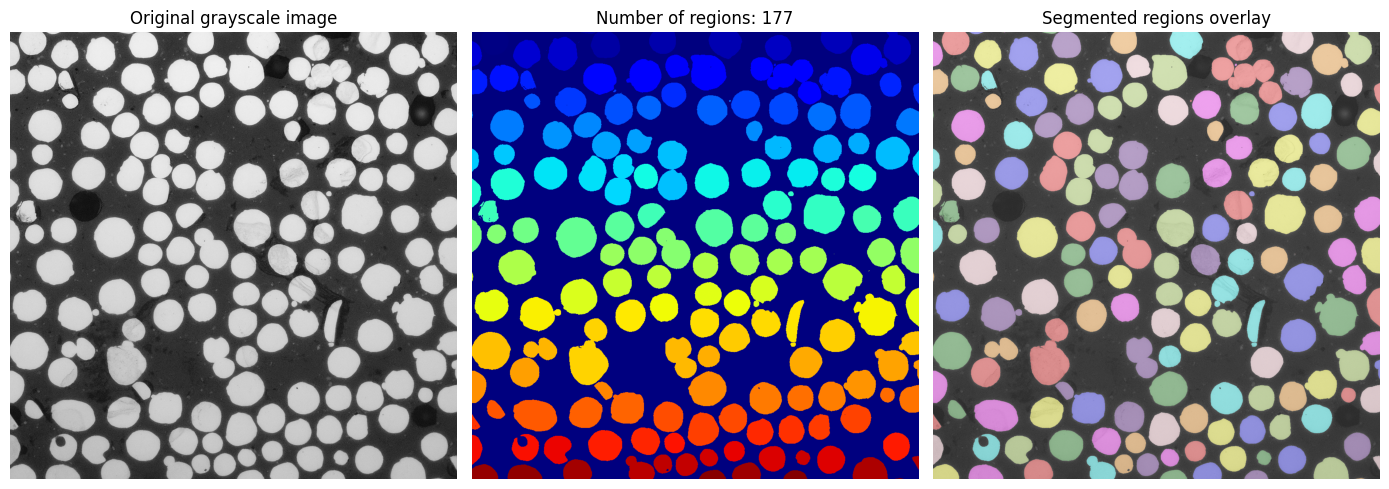

In [19]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb


thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

Descripción del resultado:
**¿Cuántas regiones hay en la imagen?**

hay 177 regiones

## 6. Extrae característica de cada región: el área, la longitud del eje mayor y la orientación de cada región. Informa de los valores promedio de las características extraídas. Representa un diagrama de dispersión (scatterplot) del área frente a la longitud del eje mayor.

*(1,5 puntos)*

In [24]:
import pandas as pd

from skimage import data, measure
props = measure.regionprops_table(label_image,properties=['label','area','major_axis_length','orientation'])

df_propietats = pd.DataFrame(props)
df_propietats.head()

,label,area,major_axis_length,orientation
0,1,2822.0,65.427996,1.566080
1,2,112.0,28.952874,-1.561850
2,3,1.0,0.000000,-0.785398
3,4,2.0,2.000000,1.570796
4,5,97.0,33.145526,1.548067


<Axes: xlabel='major_axis_length', ylabel='area'>

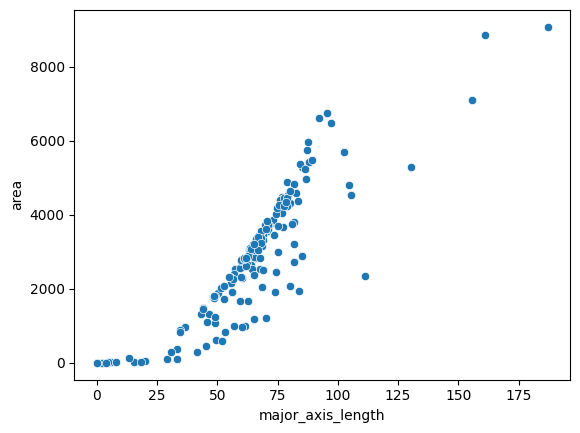

In [25]:
import seaborn as sns

sns.scatterplot(x='major_axis_length',y='area',data=df_propietats)

## 7. Usando las regiones etiquetadas de la imagen, ¿cómo puedes filtrar las regiones para encontrar aquellas con un área mayor de 4000 píxeles? Indica cuántas regiones de ese tipo hay.
*(1,5 puntos)*

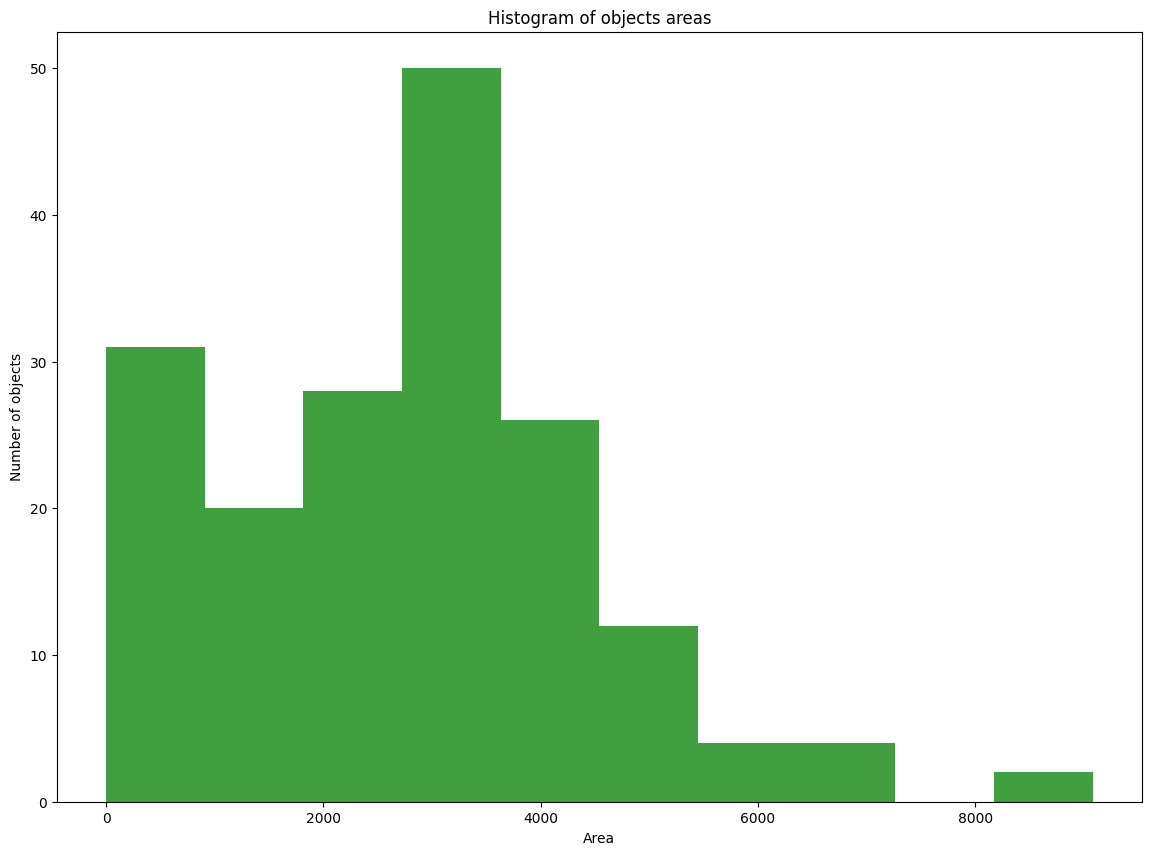

There are 38 large objects
Large objects correspond to regions: [[ 12  17  20  21  22  23  38  44  55  56  60  62  65  69  73  80  83  91
   99 102 109 112 115 116 117 121 122 125 126 129 130 135 138 142 143 144
  149 155]]
The areas of the large objects are: [4050. 4318. 5436. 9080. 4481. 4267. 4580. 4434. 4526. 7099. 5282. 4393.
 4899. 4454. 6757. 5744. 6624. 4809. 5287. 5486. 5378. 4464. 6474. 4973.
 4028. 8870. 4845. 5960. 4546. 4182. 4369. 5242. 4257. 4647. 4232. 5701.
 4248. 4350.]


In [22]:
import numpy as np
from skimage.measure import regionprops
import numpy as np

props = regionprops(label_image)


area = np.zeros(nregions)
for i in range(0,nregions):
    area[i] = props[i].area

# Plot histogram of the areas
fig = plt.figure(figsize=(14, 10))
n, bins, patches = plt.hist(area, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Area')
plt.ylabel('Number of objects')
plt.title('Histogram of objects areas')
plt.show()

ind_large = np.where(area > 4000)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} large objects'.format(len(area_large)))
print('Large objects correspond to regions: {}'.format(ind_lregions))
print('The areas of the large objects are: {}'.format(area_large))

In [31]:

# Filtrar regiones con área mayor de 4000 píxeles
regiones_grandes = df_propietats[df_propietats['area'] > 4000]

# Mostrar las regiones filtradas
regiones_grandes


,label,area,major_axis_length,orientation
11,12,4050.0,76.923058,0.034662
16,17,4318.0,79.996904,1.270463
19,20,5436.0,87.863093,0.685520
20,21,9080.0,187.160290,1.210600
21,22,4481.0,76.816172,-0.659809
22,23,4267.0,76.764522,1.321716
37,38,4580.0,82.743160,-0.217683
43,44,4434.0,76.787180,1.240795
54,55,4526.0,79.306352,-1.073211
55,56,7099.0,155.703077,0.014555


hay 38 regiones de ese tipo

## 8. Ahora usaremos el algoritmo Otsu utilizando la imagen sin ruído. Muestra los resultados e indica el número de regiones detectadas.

*(2 puntos)*

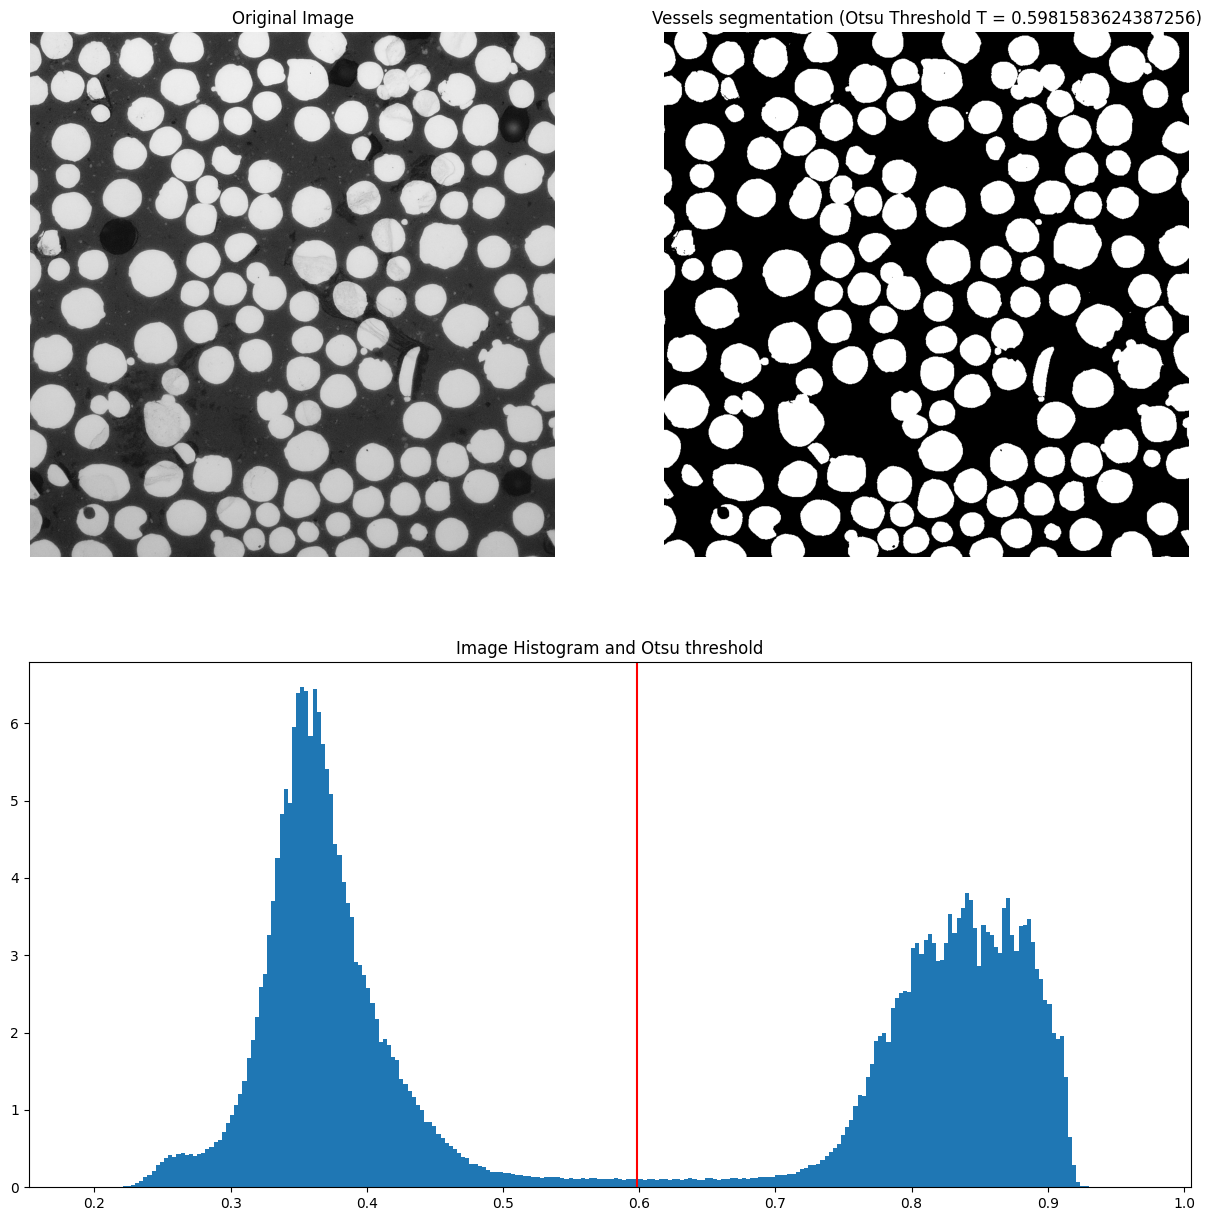

In [26]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(IG)

# Apply threshold to test image:
I_otsu = IG >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(IG.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.set_title('Image Histogram and Otsu threshold')
plt.show()

## 9. CONCLUSIÓN FINAL

- Que método ha funcionado mejor? Has obtenido los mismos resultados? Razona y discute los resultados.
- Haz una valoración general del curso y de los conceptos aprendidos.

*(1 punto)*

La método otsu ha funcionado mejor que la método kmeans. He obtenido los mismos resultados. Porque en los dos casos aplicamos un thresols que separado en dos partidos nuestro imagen y la segmentation de dos metodos son igual.
la metodo kmeans utiliza el numéro de clusters y la metodo otsu utiliza el median.

